In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('emotions_cleaned.csv', index_col=0)

In [37]:
df.shape

(19948, 2)

In [38]:
df.tail()

,text,emotion
19995,examination tomorrow morning quite well prepar...,sadness
19996,constantly worry fight nature push limit inner...,joy
19997,feel important share info experience thing,joy
19998,truly feel passionate enough something stay tr...,joy
19999,feel like cute make online even,joy


In [39]:
df.emotion.unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [53]:
e2i = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'love': 4, 'surprise': 5}
i2e = {0:'joy', 1:'sadness', 2:'anger', 3:'fear', 4:'love', 5:'surprise'}

df['emotion'] = df['emotion'].replace(e2i)

In [41]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

text       0
emotion    0
dtype: int64

## Emotion detection

In [42]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=42)

In [43]:
# building a structured representation

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report ,ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

def check_scores(clf, X_train, X_test, y_train, y_test):

    model=clf.fit(X_train, y_train)
    predicted_class=model.predict(X_test)
    predicted_class_train=model.predict(X_train)
    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:, 1]

    class_names = ['joy', 'sadness','anger','fear','love','surprise']
    plt.figure(figsize=(10,10))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predicted_class_train),display_labels=class_names)
    disp.plot()
    plt.xticks(rotation=90)
    plt.title("Train Confusion Matrix")
    plt.show()


    plt.figure(figsize=(10,10))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_class),display_labels=class_names)
    disp.plot()
    plt.xticks(rotation=90)
    plt.title("Test Confusion Matrix")
    plt.show()

    print()
    print(classification_report(y_test,predicted_class))
    print()
    train_accuracy = accuracy_score(y_train,predicted_class_train)
    test_accuracy = accuracy_score(y_test,predicted_class)

    print()
    print("Train f1: ", f1_score(y_train, predicted_class_train,average='weighted'))
    print("Test f1: ", f1_score(y_test, predicted_class,average='weighted'))
    print()
    print("Train accuracy score: ", train_accuracy)
    print("Test accuracy score: ",test_accuracy)

    return model

<Figure size 720x720 with 0 Axes>

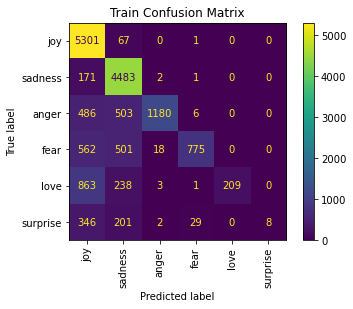

<Figure size 720x720 with 0 Axes>

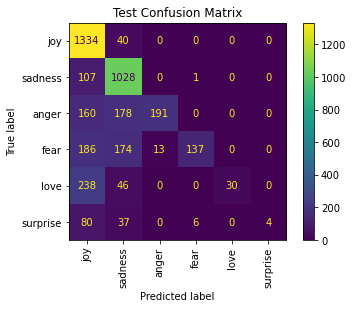


              precision    recall  f1-score   support

           0       0.63      0.97      0.77      1374
           1       0.68      0.90      0.78      1136
           2       0.94      0.36      0.52       529
           3       0.95      0.27      0.42       510
           4       1.00      0.10      0.17       314
           5       1.00      0.03      0.06       127

    accuracy                           0.68      3990
   macro avg       0.87      0.44      0.45      3990
weighted avg       0.77      0.68      0.62      3990



Train f1:  0.7043560230052831
Test f1:  0.6242155822209945

Train accuracy score:  0.7492636460487561
Test accuracy score:  0.6827067669172933


In [45]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb = check_scores(mnb, X_train_tfidf, X_test_tfidf, y_train, y_test)

<Figure size 720x720 with 0 Axes>

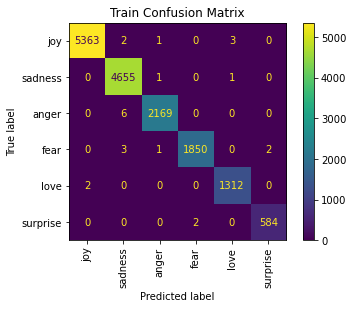

<Figure size 720x720 with 0 Axes>

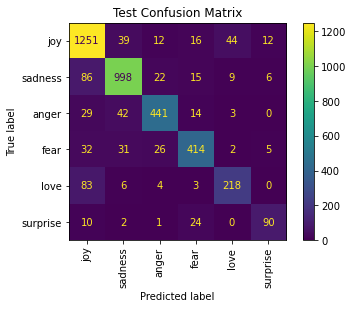


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1374
           1       0.89      0.88      0.89      1136
           2       0.87      0.83      0.85       529
           3       0.85      0.81      0.83       510
           4       0.79      0.69      0.74       314
           5       0.80      0.71      0.75       127

    accuracy                           0.86      3990
   macro avg       0.84      0.81      0.82      3990
weighted avg       0.86      0.86      0.85      3990



Train f1:  0.9984959356393904
Test f1:  0.8541224197684715

Train accuracy score:  0.9984959578868209
Test accuracy score:  0.8551378446115289


In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)

rfc = check_scores(rfc, X_train_tfidf, X_test_tfidf, y_train, y_test)

import pickle
pickle.dump(rfc, open('rfc_model.pkl', 'wb'))

<Figure size 720x720 with 0 Axes>

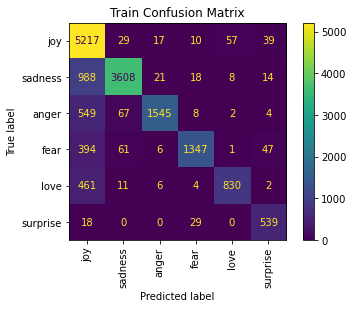

<Figure size 720x720 with 0 Axes>

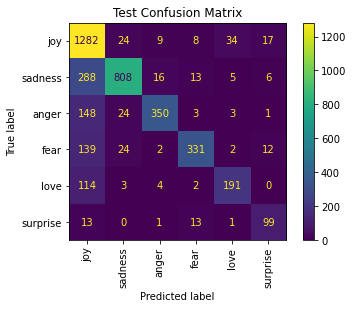


              precision    recall  f1-score   support

           0       0.65      0.93      0.76      1374
           1       0.92      0.71      0.80      1136
           2       0.92      0.66      0.77       529
           3       0.89      0.65      0.75       510
           4       0.81      0.61      0.69       314
           5       0.73      0.78      0.76       127

    accuracy                           0.77      3990
   macro avg       0.82      0.72      0.76      3990
weighted avg       0.81      0.77      0.77      3990



Train f1:  0.8213064987506685
Test f1:  0.7675607313289946

Train accuracy score:  0.8200789622109419
Test accuracy score:  0.7671679197994987


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc = check_scores(gbc, X_train_tfidf, X_test_tfidf, y_train, y_test)


### Predicting for new text:

In [50]:
import pickle
rfc = pickle.load(open('rfc_model.pkl', 'rb'))

In [58]:
string = 'happiness is a warm gun'
# note, text should go through the same cleaning procedure
transformed_text = tfidf.transform([string])
i2e[rfc.predict(transformed_text)[0]]

'anger'

In [62]:
string = 'stop crying your heart out'
# note, text should go through the same cleaning procedure
transformed_text = tfidf.transform([string])
i2e[rfc.predict(transformed_text)[0]]

'fear'

## Are we missing something?

![OOD](img.png)